In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import  precision_score, recall_score, f1_score,  classification_report, roc_curve
from sklearn.metrics import  plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, plot_precision_recall_curve,average_precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [4]:
df=pd.read_csv('DataSheet_2_Proteomic Approaches to Defining Remission and the Risk of Relapse in Rheumatoid Arthritis.csv')

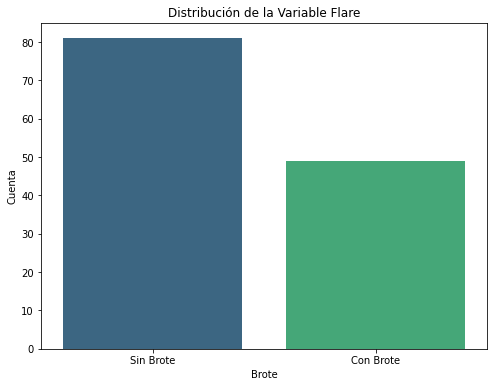

In [5]:
import seaborn as sns
flare_counts = df['Flare'].value_counts()

# Gráfica de la distribución de la variable 'Flare' con etiquetas en español
plt.figure(figsize=(8,6))
sns.barplot(x=flare_counts.index, y=flare_counts.values, palette='viridis')
plt.title('Distribución de la Variable Flare')
plt.xlabel('Brote')
plt.ylabel('Cuenta')
plt.xticks([0, 1], ['Sin Brote', 'Con Brote'])
plt.show()

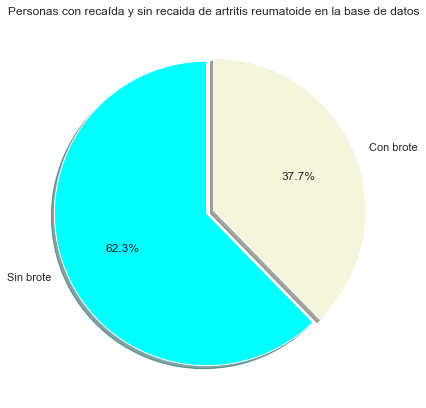

In [6]:
sns.set(style="whitegrid")
labels=["Sin brote",'Con brote']
sizes=df['Flare'].value_counts(sort=True)
colors=['cyan','beige']
explode=(0.05,0)
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Personas con recaída y sin recaida de artritis reumatoide en la base de datos')
plt.show()

In [7]:
df.shape

(130, 1327)

In [8]:
def box(r):
    sns.boxplot(x=r)
    plt.title("Box plot antes de eliminar outliers")
    plt.show()

    q1=r.quantile(0.25)
    q3=r.quantile(0.75)
    iqr=q3-q1

    Lower_tail=q1-1.5*iqr
    Upper_tail=q3+1.5*iqr

    med=np.median(r)
    for i in r:
        if i > Upper_tail or i < Lower_tail:
            r=r.replace(i,med)


    sns.boxplot(x=r)
    plt.title('Boxplot después de imputación de media')
    plt.show()

In [9]:
df2=df

### Función de outliers

In [18]:
def detect_outliers(df):
    outlier_indices = {}
    for column in df.columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
        outlier_indices[column] = outliers
    return outlier_indices

In [19]:
outlier_indices = detect_outliers(df)

In [21]:
X = df.drop(columns=['ID'])
y = df['Flare']

# Selección de características por revisión de la literatura

In [22]:
X


,cluster,Flare,STUB1,CEBPB,ENO2,PIAS4,IL10RA,STAT3,IRF1,JUN,...,LGALS9,UBE2G2,TAGLN2,ATP5O,CRYZL1,SERPINF1,CTSF,FTCD,USP25,PLXNB2
0,1,0,10.20,10.65,10.74,9.95,11.38,9.62,10.16,12.51,...,10.90,12.52,15.43,13.15,9.81,15.72,11.23,9.91,10.51,12.39
1,2,0,10.13,10.28,11.23,9.92,11.86,9.64,10.84,12.12,...,11.07,12.45,13.31,12.80,8.90,15.80,11.79,9.55,10.22,12.83
2,1,0,10.29,10.94,10.31,10.51,10.74,10.31,10.09,13.00,...,10.69,12.48,13.77,12.66,10.10,15.51,11.69,13.78,10.38,12.35
3,1,1,10.50,11.03,10.34,10.19,11.28,9.24,10.02,12.27,...,10.74,12.28,12.80,12.57,9.44,15.66,11.69,9.66,10.33,12.78
4,3,0,10.01,11.89,10.08,9.68,11.13,9.17,10.18,12.96,...,10.87,12.62,12.26,12.43,9.94,15.62,11.90,10.66,10.29,12.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3,1,10.44,10.66,10.56,9.75,11.32,9.02,10.34,12.62,...,10.77,12.70,12.69,13.38,10.16,15.54,12.59,9.60,10.39,12.39
126,4,0,10.08,10.56,9.96,10.15,10.97,9.39,10.18,12.90,...,10.84,12.38,11.98,11.38,9.85,15.79,11.80,9.63,10.09,12.74
127,4,0,10.24,10.76,9.98,9.89,11.04,8.90,10.36,13.10,...,11.51,12.87,11.98,10.98,10.91,15.75,11.76,12.45,10.39,12.69
128,3,1,10.82,10.46,10.48,11.74,11.54,9.89,10.29,12.44,...,10.50,12.81,13.49,12.41,9.88,15.78,12.22,9.26,10.16,13.03


In [23]:
# Media, mediana, moda, desviación std, etc.
X1=X[['CLU','TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4','MMP3', 'STAT3', 'IL34','Flare']]

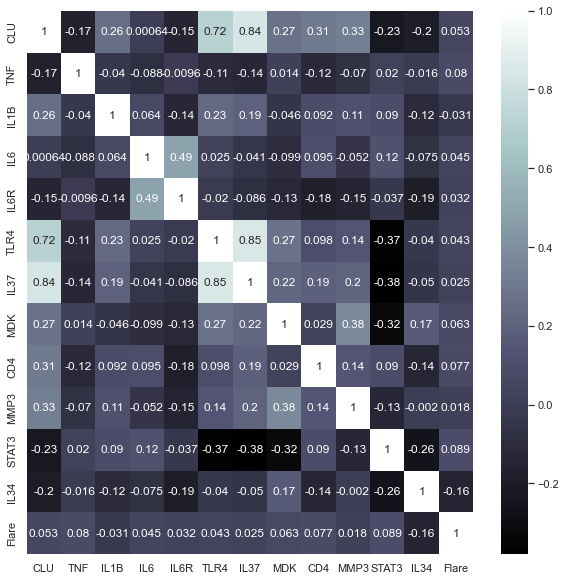

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(X1.corr(),cmap="bone",annot=True)
plt.show()

In [25]:
X1 = X1.drop(columns=['Flare'])

In [27]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


In [28]:
print('x_train df: ', X_train.shape)
print('y_train df: ', y_train.shape)
print('x_test df: ', X_test.shape)
print('y_test df: ', y_test.shape)

x_train df:  (104, 12)
y_train df:  (104,)
x_test df:  (26, 12)
y_test df:  (26,)


Para evaluar la relación de cada característica individual con la variable objetivo Flare, calcular el AUC con su intervalo de confianza del 95%, encontrar el valor óptimo para cada proteína y realizar una validación cruzada, podemos seguir estos pasos:

1. Entrenar un modelo de regresión logística para cada característica.
2. Calcular el AUC y su intervalo de confianza del 95% para cada modelo.
3. Determinar el valor óptimo de cada proteína.
4. Realizar la validación cruzada.
## Regresión logística
### Paso 1: Entrenar un Modelo de Regresión Logística para Cada Característica
Primero, creamos una función para entrenar el modelo, calcular el AUC, el intervalo de confianza del 95%, y el valor óptimo para cada proteína.


In [29]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

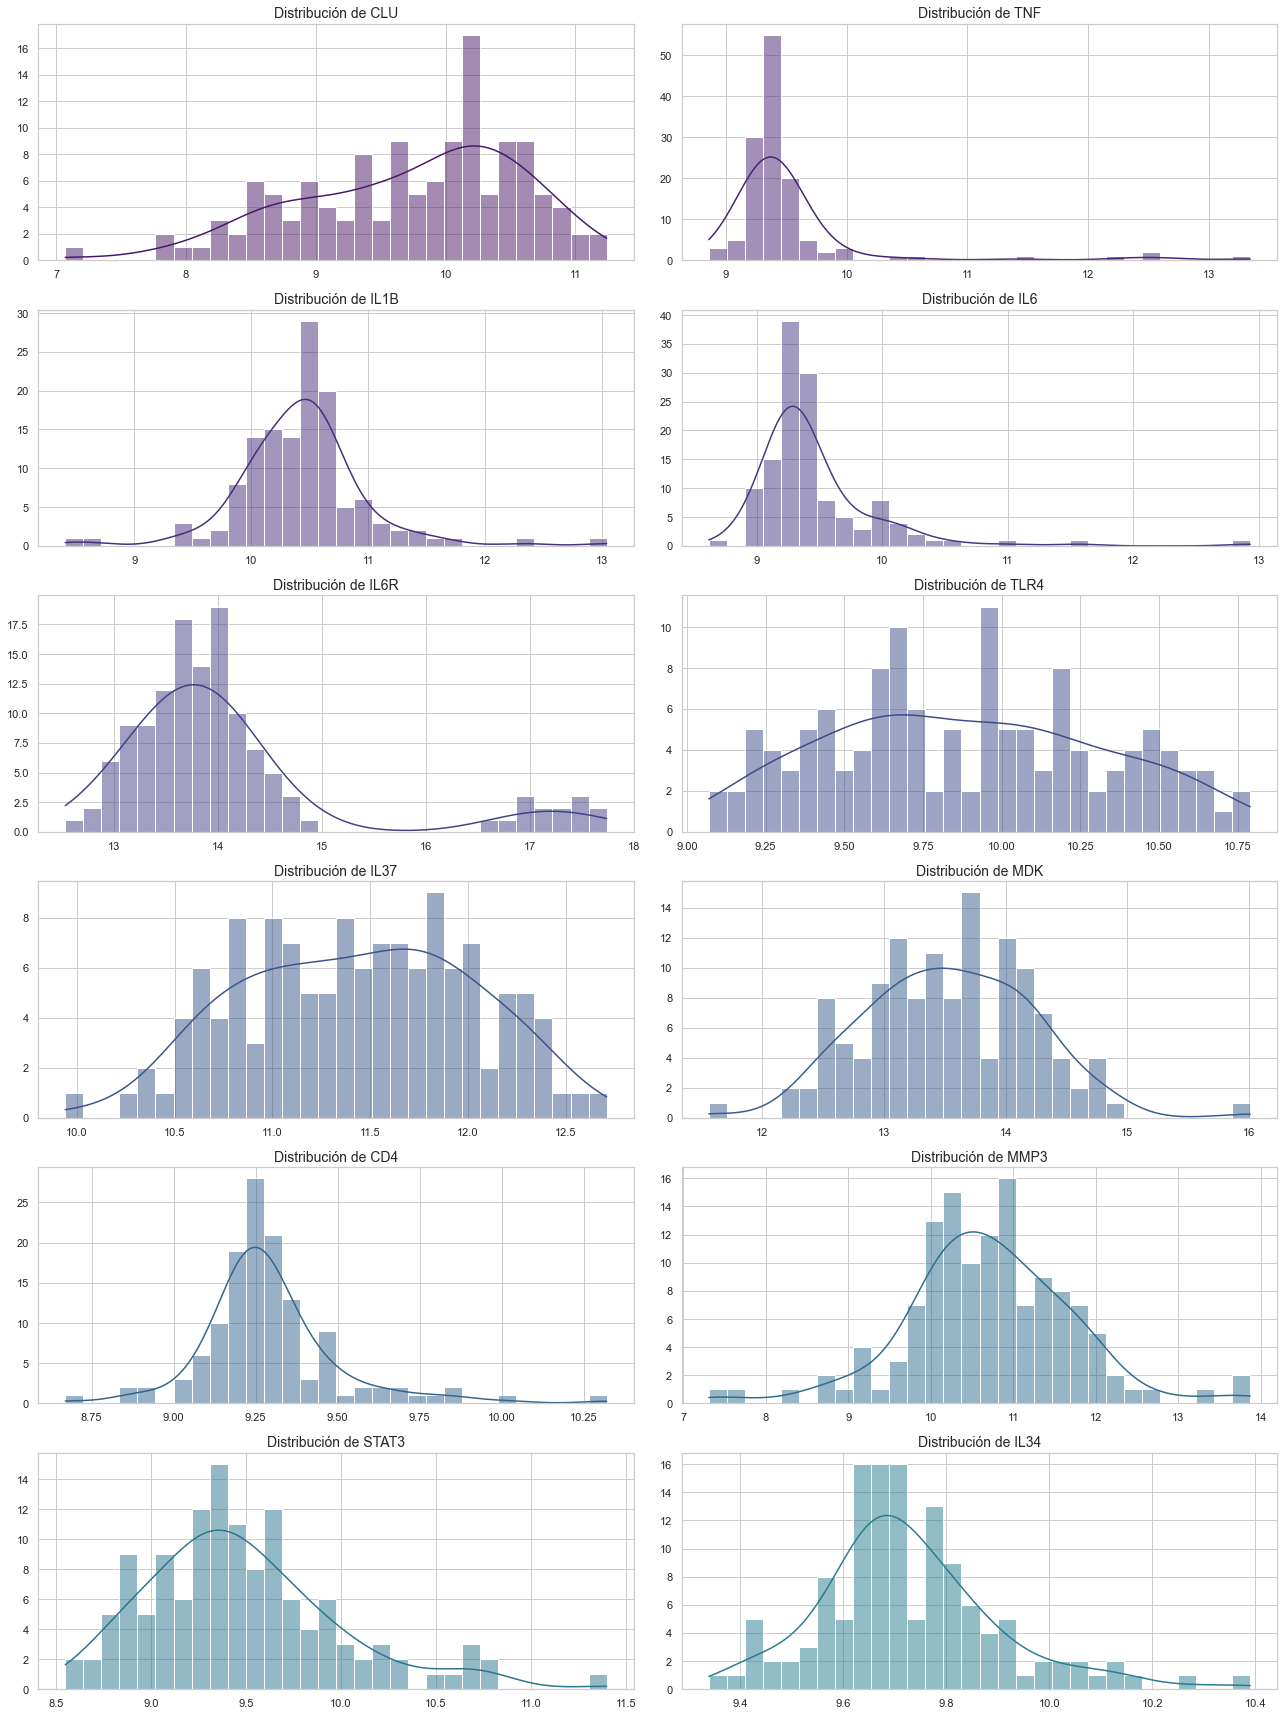

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las características de interés
features_of_interest = ['CLU', 'TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4', 'MMP3', 'STAT3', 'IL34']

# Verificar si las características están en el DataFrame
available_features = [feature for feature in features_of_interest if feature in df.columns]

# Crear histogramas para las características disponibles con más estilo
plt.figure(figsize=(18, 24))
for i, feature in enumerate(available_features, 1):
    plt.subplot(6, 2, i)
    color = sns.color_palette("viridis", as_cmap=False, n_colors=30)
    sns.histplot(df[feature], kde=True, bins=30, color=color[i % len(color)])
    plt.title(f'Distribución de {feature}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


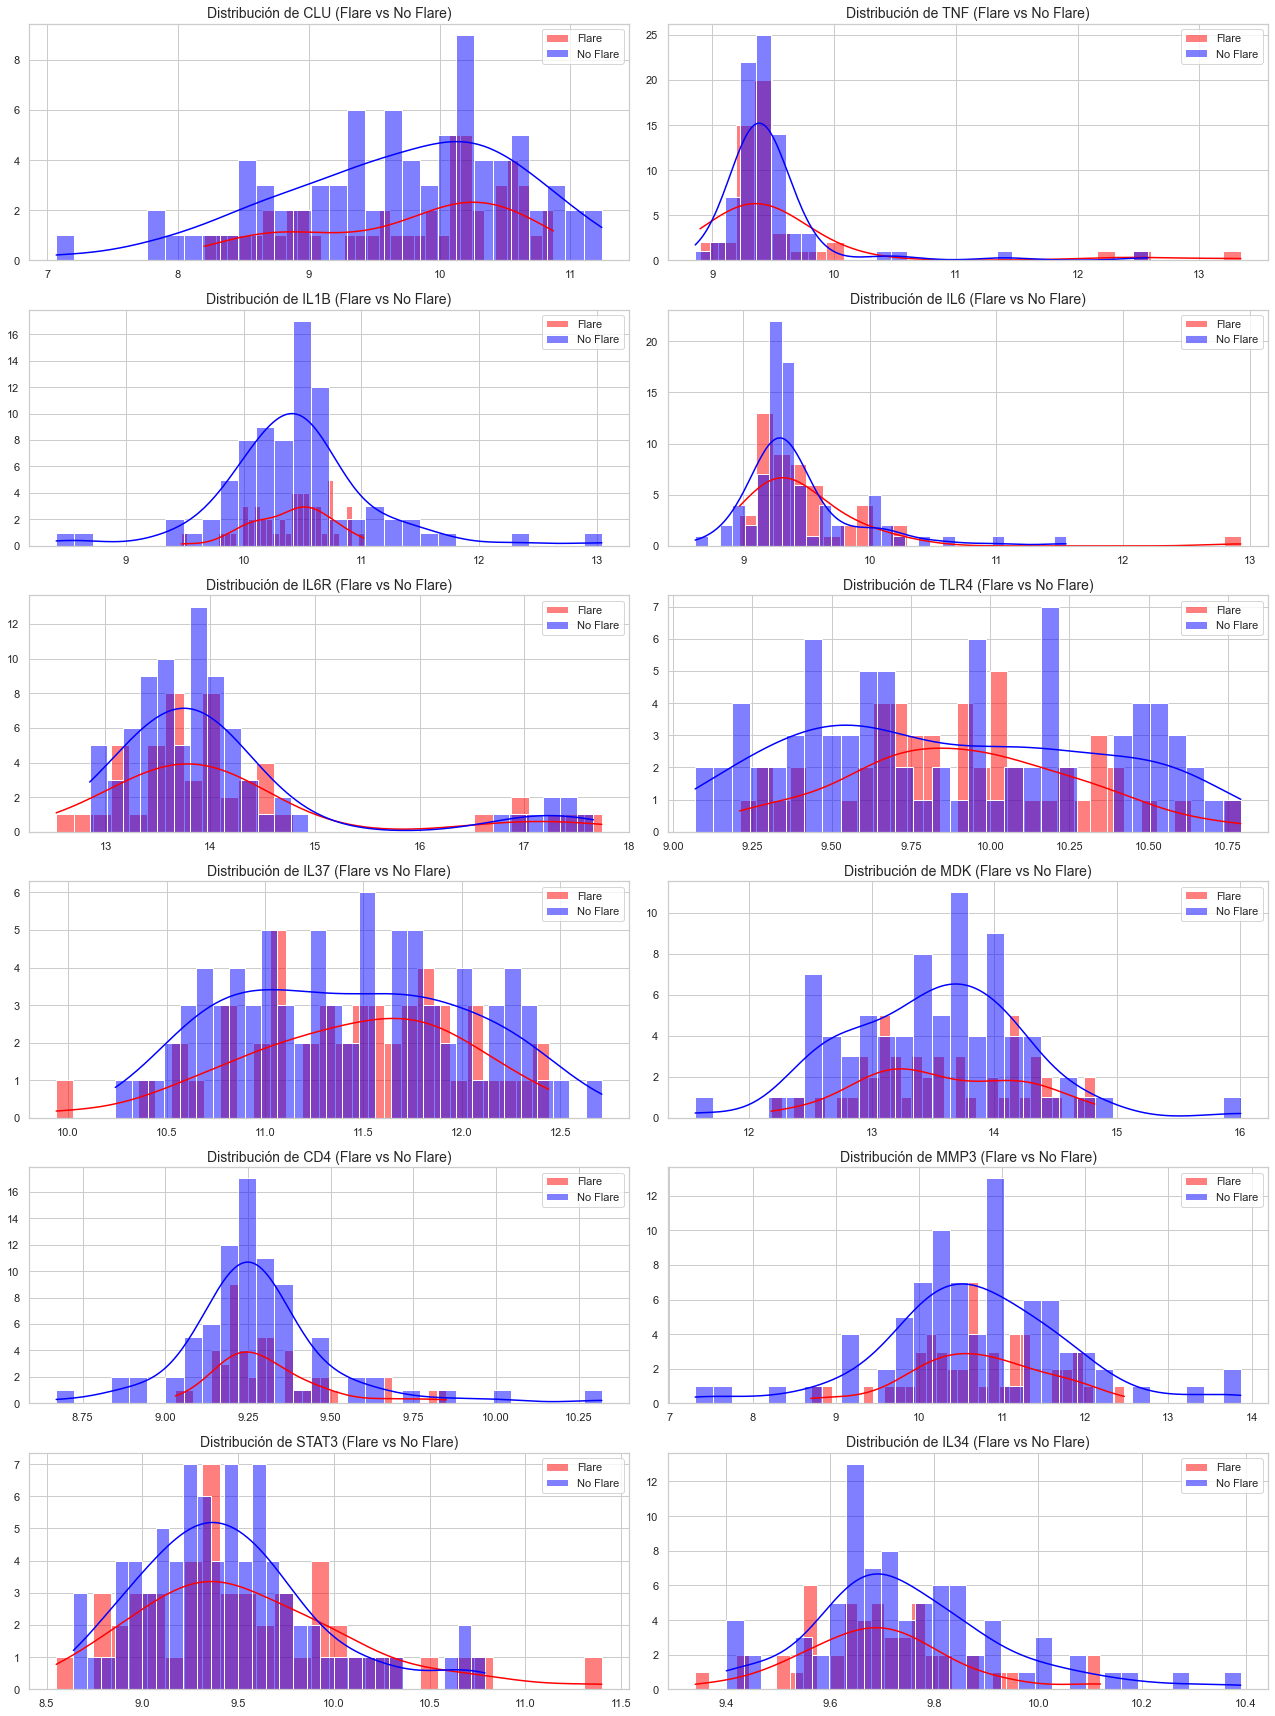

In [31]:

# Verificar si las características están en el DataFrame
available_features = [feature for feature in features_of_interest if feature in df.columns]

# Crear histogramas comparando las características entre personas con 'flare' y sin 'flare' sin degradado
plt.figure(figsize=(18, 24))
for i, feature in enumerate(available_features, 1):
    plt.subplot(6, 2, i)
    sns.histplot(df[df['Flare'] == 1][feature], kde=True, bins=30, color='red', label='Flare')
    sns.histplot(df[df['Flare'] == 0][feature], kde=True, bins=30, color='blue', label='No Flare')
    plt.title(f'Distribución de {feature} (Flare vs No Flare)', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Definir las características y la variable objetivo
X = df[['CLU', 'TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4', 'MMP3', 'STAT3', 'IL34']]
y = df['Flare']

# Función para evaluar cada característica con normalización y calcular métricas
def evaluate_feature_with_normalization(feature, X, y, n_iterations=100, random_state=42):
    # Preparar los datos
    X_feature = X[[feature]].values  # Extraer la característica específica
    y_values = y.values  # Variable objetivo
    
    # Crear un pipeline con normalización y regresión logística
    model = make_pipeline(StandardScaler(), LogisticRegression(random_state=random_state))
    
    # Entrenar el modelo
    model.fit(X_feature, y_values)
    
    # Predecir probabilidades
    y_pred_prob = model.predict_proba(X_feature)[:, 1]
    
    # Calcular la curva ROC para determinar el umbral óptimo
    fpr, tpr, thresholds = roc_curve(y_values, y_pred_prob)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    
    # Predecir las clases usando el umbral óptimo
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)
    
    # Calcular AUC
    auc = roc_auc_score(y_values, y_pred_prob)
    
    # Calcular especificidad y sensibilidad
    tn, fp, fn, tp = confusion_matrix(y_values, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    # Bootstrap para intervalo de confianza del AUC y otras métricas
    np.random.seed(random_state)
    aucs = []
    accuracies = []
    sensitivities = []
    specificities = []
    optimal_values = []
    
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X_feature, y_values)
        model.fit(X_resampled, y_resampled)
        y_pred_prob_resampled = model.predict_proba(X_resampled)[:, 1]
        fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_resampled, y_pred_prob_resampled)
        optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
        optimal_value_resampled = X_resampled[:, 0][optimal_idx_resampled]
        optimal_values.append(optimal_value_resampled)
        
        y_pred_resampled = (y_pred_prob_resampled >= thresholds_resampled[optimal_idx_resampled]).astype(int)
        aucs.append(roc_auc_score(y_resampled, y_pred_prob_resampled))
        accuracies.append(accuracy_score(y_resampled, y_pred_resampled))
        
        tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_resampled, y_pred_resampled).ravel()
        sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
        specificities.append(tn_resampled / (tn_resampled + fp_resampled))
        
    auc_ci = np.percentile(aucs, [2.5, 97.5])
    accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
    sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
    specificity_ci = np.percentile(specificities, [2.5, 97.5])
    optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])
    
    # Validación cruzada para AUC
    cv_auc_scores = cross_val_score(model, X_feature, y_values, cv=5, scoring='roc_auc')
    mean_cv_auc = np.mean(cv_auc_scores)
    
    # Validación cruzada para accuracy
    cv_accuracy_scores = cross_val_score(model, X_feature, y_values, cv=5, scoring='accuracy')
    mean_cv_accuracy = np.mean(cv_accuracy_scores)
    
    return {
        'feature': feature,
        'auc': auc,
        'auc_ci': auc_ci,
        'accuracy_ci': accuracy_ci,
        'sensitivity_ci': sensitivity_ci,
        'specificity_ci': specificity_ci,
        'optimal_value_ci': optimal_value_ci,
        'mean_cv_auc': mean_cv_auc,
        'mean_cv_accuracy': mean_cv_accuracy,
        'specificity': specificity,
        'sensitivity': sensitivity,
        'optimal_value': optimal_value_resampled,
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds
    }

# Función para redondear intervalos de confianza y otros resultados a 3 decimales
def round_results(results):
    for key, value in results.items():
        if isinstance(value, (float, int)):
            results[key] = round(value, 3)
        elif isinstance(value, list) or isinstance(value, np.ndarray):
            results[key] = [round(v, 3) for v in value]
    return results

# Evaluar cada característica
results = []
for feature in X.columns:
    result = evaluate_feature_with_normalization(feature, X, y)
    result = round_results(result)  # Redondear los resultados
    results.append(result)

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)

# Eliminar las columnas no deseadas
df_results_cleaned = df_results.drop(columns=['fpr', 'tpr', 'thresholds'])

# Exportar la tabla a un archivo Excel
df_results_cleaned.to_excel('resultados_proteinas.xlsx', index=False)

# Mostrar una vista previa en Jupyter Notebook
df_results_cleaned.head()



,feature,auc,auc_ci,accuracy_ci,sensitivity_ci,specificity_ci,optimal_value_ci,mean_cv_auc,mean_cv_accuracy,specificity,sensitivity,optimal_value
0,CLU,0.524,"[0.488, 0.627]","[0.465, 0.669]","[0.324, 0.991]","[0.161, 0.846]","[8.238, 10.75]",0.511,0.623,0.543,0.571,8.45
1,TNF,0.459,"[0.387, 0.63]","[0.453, 0.719]","[0.077, 0.969]","[0.134, 1.0]","[8.991, 10.46]",0.402,0.600,0.951,0.122,9.36
2,IL1B,0.493,"[0.456, 0.625]","[0.415, 0.65]","[0.337, 1.0]","[0.107, 0.837]","[9.39, 11.332]",0.398,0.615,0.136,1.000,10.67
3,IL6,0.519,"[0.456, 0.631]","[0.461, 0.689]","[0.236, 0.991]","[0.141, 0.898]","[8.98, 10.04]",0.479,0.615,0.679,0.449,9.68
4,IL6R,0.520,"[0.46, 0.614]","[0.419, 0.696]","[0.183, 0.959]","[0.135, 0.961]","[12.9, 17.475]",0.419,0.623,0.815,0.286,13.68


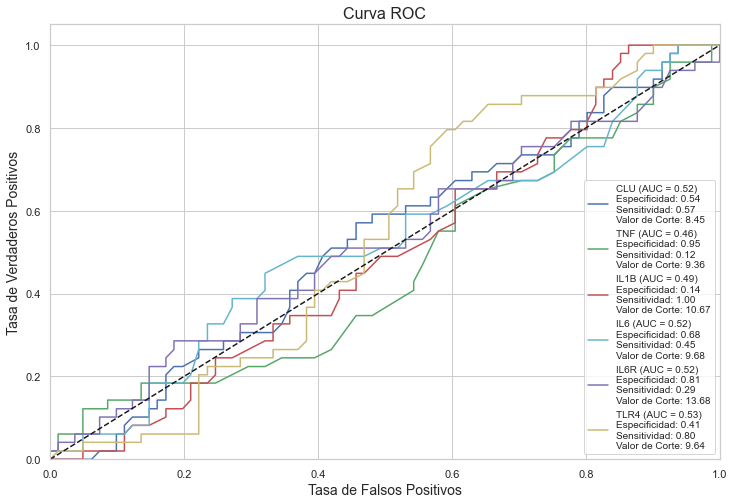

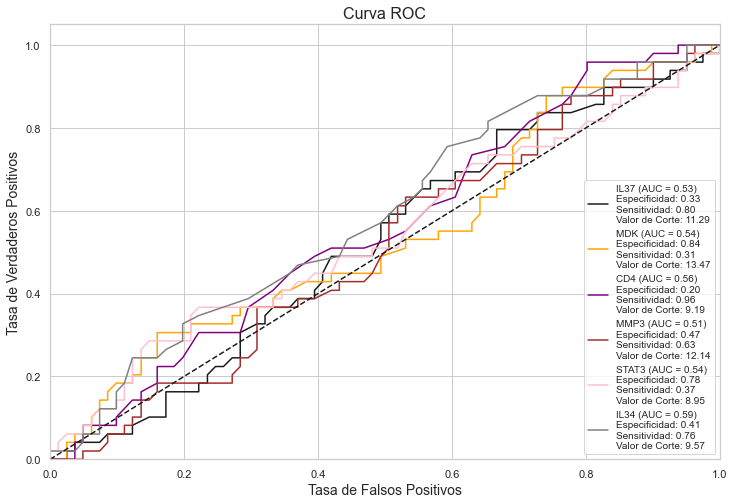

In [34]:
# Dividir las características en dos grupos
features_group1 = df_results['feature'][:6]
features_group2 = df_results['feature'][6:]

# Crear dos figuras
fig1, ax1 = plt.subplots(figsize=(12, 8))
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Colores para las curvas
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray']

# Dibujar las curvas ROC para el primer grupo
for i, feature in enumerate(features_group1):
    result = df_results[df_results['feature'] == feature].iloc[0]
    ax1.plot(result['fpr'], result['tpr'], color=colors[i], label=f"{feature} (AUC = {result['auc']:.2f})\nEspecificidad: {result['specificity']:.2f}\nSensitividad: {result['sensitivity']:.2f}\nValor de Corte: {result['optimal_value']:.2f}")

# Dibujar las curvas ROC para el segundo grupo
for i, feature in enumerate(features_group2):
    result = df_results[df_results['feature'] == feature].iloc[0]
    ax2.plot(result['fpr'], result['tpr'], color=colors[i+6], label=f"{feature} (AUC = {result['auc']:.2f})\nEspecificidad: {result['specificity']:.2f}\nSensitividad: {result['sensitivity']:.2f}\nValor de Corte: {result['optimal_value']:.2f}")

# Configurar las figuras
for ax in [ax1, ax2]:
    ax.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos', fontsize=14)
    ax.set_ylabel('Tasa de Verdaderos Positivos', fontsize=14)
    ax.set_title('Curva ROC', fontsize=16)
    ax.legend(loc='lower right', fontsize=10)

# Mostrar las figuras
plt.show()


## Modelo regresión logística multivariable

     AUC          AUC_CI     Accuracy_CI Sensitivity_CI  Specificity_CI  \
0  0.491  [0.678, 0.837]  [0.626, 0.819]  [0.55, 0.989]  [0.436, 0.919]   

  Optimal_Value_CI  Mean_CV_AUC  Mean_CV_Accuracy  Specificity  Sensitivity  \
0   [0.243, 0.512]        0.404             0.538         0.76        0.429   

   Optimal_Value  
0          0.422  


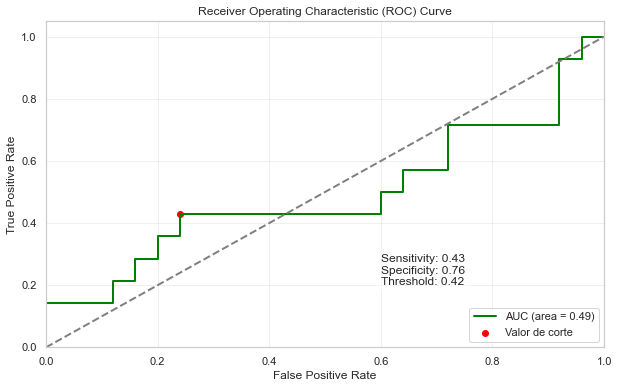

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


# Definir las características y la variable objetivo
X = df[['CLU', 'TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4', 'MMP3', 'STAT3', 'IL34']]
y = df['Flare']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predecir probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para determinar el umbral óptimo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Predecir las clases usando el umbral óptimo
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Calcular especificidad y sensibilidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Bootstrap para intervalo de confianza del AUC y otras métricas
n_iterations = 100
random_state = 42
np.random.seed(random_state)
aucs = []
accuracies = []
sensitivities = []
specificities = []
optimal_values = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    model.fit(X_resampled, y_resampled)
    y_pred_prob_resampled = model.predict_proba(X_resampled)[:, 1]
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_resampled, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    optimal_values.append(optimal_value_resampled)
    
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    aucs.append(roc_auc_score(y_resampled, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_resampled, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_resampled, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))
    
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

# Validación cruzada para AUC
cv_auc_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)

# Validación cruzada para accuracy
cv_accuracy_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

# Redondear los resultados a 3 decimales
def round_results(value):
    if isinstance(value, (float, int)):
        return round(value, 3)
    elif isinstance(value, list) or isinstance(value, np.ndarray):
        return [round(v, 3) for v in value]
    return value

results = {
    'AUC': round_results(auc),
    'AUC_CI': round_results(auc_ci),
    'Accuracy_CI': round_results(accuracy_ci),
    'Sensitivity_CI': round_results(sensitivity_ci),
    'Specificity_CI': round_results(specificity_ci),
    'Optimal_Value_CI': round_results(optimal_value_ci),
    'Mean_CV_AUC': round_results(mean_cv_auc),
    'Mean_CV_Accuracy': round_results(mean_cv_accuracy),
    'Specificity': round_results(specificity),
    'Sensitivity': round_results(sensitivity),
    'Optimal_Value': round_results(optimal_threshold)
}

df_results = pd.DataFrame([results])
df_results.to_excel('resultados_multivariable_proteinas.xlsx', index=False)

print(df_results)


# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='AUC (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Valor de corte')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
# Mostrar valores de sensibilidad, especificidad y valor de corte
plt.text(0.6, 0.2, f'Sensitivity: {sensitivity:.2f}\nSpecificity: {specificity:.2f}\nThreshold: {optimal_threshold:.2f}',
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12)

plt.show()

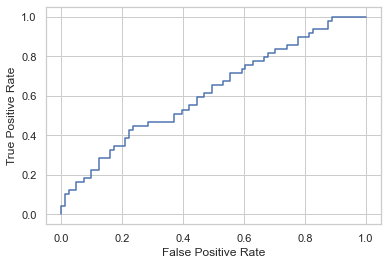

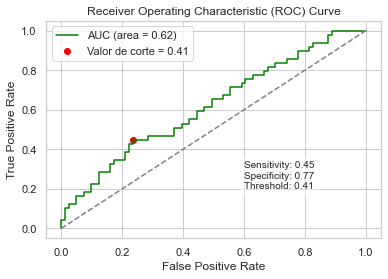

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample


# Definir X 
X = df[['CLU', 'TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4', 'MMP3', 'STAT3', 'IL34']]
y = df['Flare']

# Escalado robusto para las variables
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Crear un modelo de regresión logística multivariable
model = LogisticRegression(random_state=42)
model.fit(X_scaled, y)

# Predecir probabilidades
y_pred_prob = model.predict_proba(X_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Calcular el AUC
auc = roc_auc_score(y, y_pred_prob)

# Predecir las clases usando un umbral óptimo
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Calcular especificidad y sensibilidad
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Bootstrap para intervalo de confianza del AUC y otras métricas
n_iterations = 1000
np.random.seed(42)
aucs, accuracies, sensitivities, specificities, optimal_values = [], [], [], [], []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_scaled, y)
    model.fit(X_resampled, y_resampled)
    y_pred_prob_resampled = model.predict_proba(X_resampled)[:, 1]
    
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_resampled, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    aucs.append(roc_auc_score(y_resampled, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_resampled, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_resampled, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))
    optimal_values.append(optimal_value_resampled)

# Intervalos de confianza
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

# Validación cruzada para AUC y accuracy
cv_auc_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)

cv_accuracy_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

# Crear un DataFrame con los resultados
results = {
    'Característica': [
        'AUC', 
        'IC del AUC', 
        'IC de la Precisión', 
        'IC de la Sensibilidad', 
        'IC de la Especificidad', 
        'IC del Valor Óptimo', 
        'AUC CV Promedio', 
        'Precisión CV Promedio', 
        'Especificidad', 
        'Sensibilidad', 
        'Valor Óptimo'
    ],
    'Valor': [
        round(auc, 3),
        f"[{round(auc_ci[0], 3)}, {round(auc_ci[1], 3)}]",
        f"[{round(accuracy_ci[0], 3)}, {round(accuracy_ci[1], 3)}]",
        f"[{round(sensitivity_ci[0], 3)}, {round(sensitivity_ci[1], 3)}]",
        f"[{round(specificity_ci[0], 3)}, {round(specificity_ci[1], 3)}]",
        f"[{round(optimal_value_ci[0], 3)}, {round(optimal_value_ci[1], 3)}]",
        round(mean_cv_auc, 3),
        round(mean_cv_accuracy, 3),
        round(specificity, 3),
        round(sensitivity, 3),
        round(optimal_threshold, 3)
    ]
}

df_results = pd.DataFrame(results)

# Exportar los resultados a un archivo Excel
df_results.to_excel('resultados_multivariable_proteinas_completo.xlsx', index=False)

# Mostrar la curva ROC con el valor de corte marcado
plt.figure()
plt.plot(fpr, tpr, label=f'AUC (area = {auc:.2f})', color='green')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Valor de corte = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')

# Añadir especificidad, sensibilidad y valor de corte en la gráfica
plt.text(0.6, 0.2, f'Sensitivity: {round(sensitivity, 2)}\nSpecificity: {round(specificity, 2)}\nThreshold: {round(optimal_threshold, 2)}',
         bbox=dict(facecolor='white', alpha=0.5), fontsize=10)

# Mostrar la curva ROC
plt.show()



## Bosque aleatorio

     AUC      AUC_CI Accuracy_CI Sensitivity_CI Specificity_CI  \
0  0.617  [1.0, 1.0]  [1.0, 1.0]     [1.0, 1.0]     [1.0, 1.0]   

  Optimal_Value_CI  Mean_CV_AUC  Mean_CV_Accuracy  Specificity  Sensitivity  \
0    [0.565, 0.72]        0.445             0.562         0.64        0.643   

   Optimal_Value  
0            0.4  


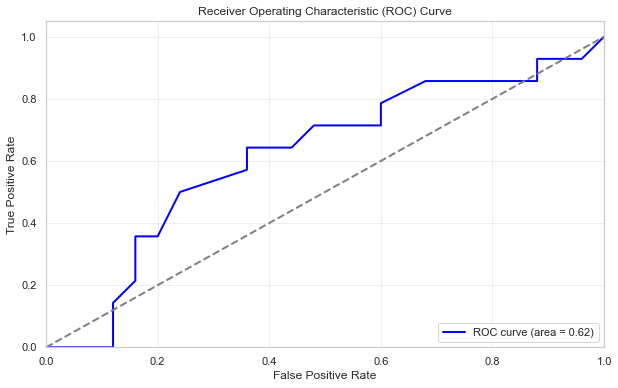

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes el DataFrame `df` cargado y definido

# Definir las características y la variable objetivo
X = df[['CLU', 'TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4', 'MMP3', 'STAT3', 'IL34']]
y = df['Flare']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para determinar el umbral óptimo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Predecir las clases usando el umbral óptimo
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Calcular especificidad y sensibilidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Bootstrap para intervalo de confianza del AUC y otras métricas
n_iterations = 100
random_state = 42
np.random.seed(random_state)
aucs = []
accuracies = []
sensitivities = []
specificities = []
optimal_values = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    model.fit(X_resampled, y_resampled)
    y_pred_prob_resampled = model.predict_proba(X_resampled)[:, 1]
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_resampled, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    optimal_values.append(optimal_value_resampled)
    
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    aucs.append(roc_auc_score(y_resampled, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_resampled, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_resampled, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))
    
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

# Validación cruzada para AUC
cv_auc_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)

# Validación cruzada para accuracy
cv_accuracy_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

# Redondear los resultados a 3 decimales
def round_results(value):
    if isinstance(value, (float, int)):
        return round(value, 3)
    elif isinstance(value, list) or isinstance(value, np.ndarray):
        return [round(v, 3) for v in value]
    return value

results = {
    'AUC': round_results(auc),
    'AUC_CI': round_results(auc_ci),
    'Accuracy_CI': round_results(accuracy_ci),
    'Sensitivity_CI': round_results(sensitivity_ci),
    'Specificity_CI': round_results(specificity_ci),
    'Optimal_Value_CI': round_results(optimal_value_ci),
    'Mean_CV_AUC': round_results(mean_cv_auc),
    'Mean_CV_Accuracy': round_results(mean_cv_accuracy),
    'Specificity': round_results(specificity),
    'Sensitivity': round_results(sensitivity),
    'Optimal_Value': round_results(optimal_threshold)
}

df_results = pd.DataFrame([results])
df_results.to_excel('resultados_multivariable_proteinas_random_forest.xlsx', index=False)

print(df_results)

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


Mejores parámetros: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}
     AUC      AUC_CI Accuracy_CI Sensitivity_CI Specificity_CI  \
0  0.659  [1.0, 1.0]  [1.0, 1.0]     [1.0, 1.0]     [1.0, 1.0]   

  Optimal_Value_CI  Mean_CV_AUC  Mean_CV_Accuracy  Specificity  Sensitivity  \
0     [0.53, 0.72]        0.458             0.592         0.88        0.429   

   Optimal_Value  
0            0.5  


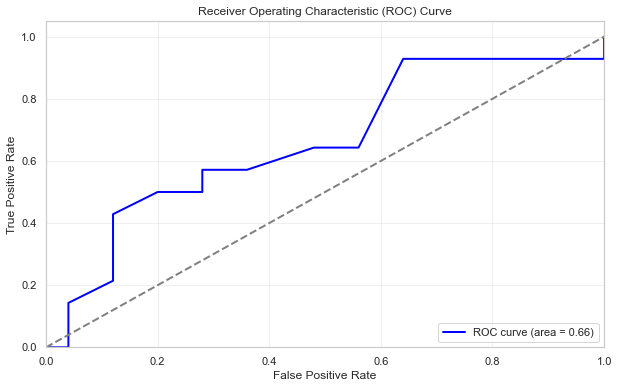

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler


# Definir las características y la variable objetivo
required_columns = ['CLU', 'TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4', 'MMP3', 'STAT3', 'IL34']
X = df[required_columns]
y = df['Flare']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Configuraciones de hiperparámetros para probar
param_list = [
    {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True},
    {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True},
]

best_score = 0
best_params = None
best_model = None

for params in param_list:
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred_prob)
    
    if score > best_score:
        best_score = score
        best_params = params
        best_model = model

print("Mejores parámetros:", best_params)

# Usar el mejor modelo encontrado
model = best_model

# Predecir probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para determinar el umbral óptimo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Predecir las clases usando el umbral óptimo
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Calcular especificidad y sensibilidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Bootstrap para intervalo de confianza del AUC y otras métricas
n_iterations = 100
random_state = 42
np.random.seed(random_state)
aucs = []
accuracies = []
sensitivities = []
specificities = []
optimal_values = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    model.fit(X_resampled, y_resampled)
    y_pred_prob_resampled = model.predict_proba(X_resampled)[:, 1]
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_resampled, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    optimal_values.append(optimal_value_resampled)
    
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    aucs.append(roc_auc_score(y_resampled, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_resampled, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_resampled, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))
    
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

# Validación cruzada para AUC
cv_auc_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)

# Validación cruzada para accuracy
cv_accuracy_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

# Redondear los resultados a 3 decimales
def round_results(value):
    if isinstance(value, (float, int)):
        return round(value, 3)
    elif isinstance(value, list) or isinstance(value, np.ndarray):
        return [round(v, 3) for v in value]
    return value

results = {
    'AUC': round_results(auc),
    'AUC_CI': round_results(auc_ci),
    'Accuracy_CI': round_results(accuracy_ci),
    'Sensitivity_CI': round_results(sensitivity_ci),
    'Specificity_CI': round_results(specificity_ci),
    'Optimal_Value_CI': round_results(optimal_value_ci),
    'Mean_CV_AUC': round_results(mean_cv_auc),
    'Mean_CV_Accuracy': round_results(mean_cv_accuracy),
    'Specificity': round_results(specificity),
    'Sensitivity': round_results(sensitivity),
    'Optimal_Value': round_results(optimal_threshold)
}

df_results = pd.DataFrame([results])

print(df_results)

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
     AUC          AUC_CI     Accuracy_CI  Sensitivity_CI Specificity_CI  \
0  0.809  [0.572, 0.821]  [0.592, 0.786]  [0.346, 0.962]   [0.348, 1.0]   

  Optimal_Value_CI  Mean_CV_AUC  Mean_CV_Accuracy  Specificity  Sensitivity  \
0   [0.366, 0.688]        0.446             0.569        0.522        0.962   

   Optimal_Value  
0          0.404  


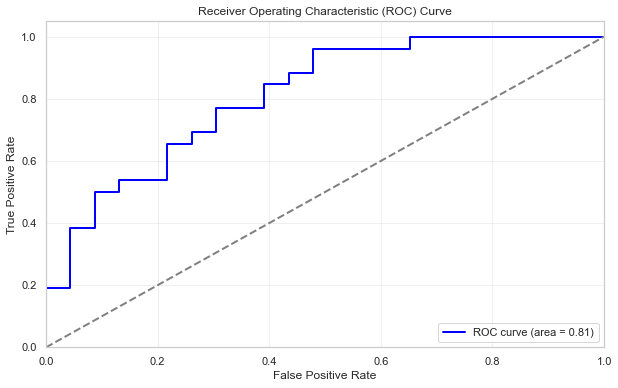

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Definir las características y la variable objetivo
required_columns = ['CLU', 'TNF', 'IL1B', 'IL6', 'IL6R', 'TLR4', 'IL37', 'MDK', 'CD4', 'MMP3', 'STAT3', 'IL34']
X = df[required_columns]
y = df['Flare']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Definir el rango de parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 500],  # Probar con más estimadores
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el modelo base
rf = RandomForestClassifier(random_state=42)

# Búsqueda de hiperparámetros con validación cruzada (5-fold)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predecir probabilidades
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para determinar el umbral óptimo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Predecir las clases usando el umbral óptimo
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Calcular especificidad y sensibilidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Bootstrap para intervalo de confianza del AUC y otras métricas
n_iterations = 100
random_state = 42
np.random.seed(random_state)
aucs = []
accuracies = []
sensitivities = []
specificities = []
optimal_values = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    best_model.fit(X_resampled, y_resampled)
    y_pred_prob_resampled = best_model.predict_proba(X_test)[:, 1]
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    optimal_values.append(optimal_value_resampled)
    
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    aucs.append(roc_auc_score(y_test, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_test, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_test, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))
    
# Calcular intervalos de confianza
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

# Validación cruzada para AUC
cv_auc_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)

# Validación cruzada para accuracy
cv_accuracy_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

# Redondear los resultados a 3 decimales
def round_results(value):
    if isinstance(value, (float, int)):
        return round(value, 3)
    elif isinstance(value, list) or isinstance(value, np.ndarray):
        return [round(v, 3) for v in value]
    return value

# Crear un DataFrame con los resultados
results = {
    'AUC': round_results(auc),
    'AUC_CI': round_results(auc_ci),
    'Accuracy_CI': round_results(accuracy_ci),
    'Sensitivity_CI': round_results(sensitivity_ci),
    'Specificity_CI': round_results(specificity_ci),
    'Optimal_Value_CI': round_results(optimal_value_ci),
    'Mean_CV_AUC': round_results(mean_cv_auc),
    'Mean_CV_Accuracy': round_results(mean_cv_accuracy),
    'Specificity': round_results(specificity),
    'Sensitivity': round_results(sensitivity),
    'Optimal_Value': round_results(optimal_threshold)
}

df_results = pd.DataFrame([results])

print(df_results)

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# Selección de características con boruta

In [59]:

df=pd.read_csv('DataSheet_2_Proteomic Approaches to Defining Remission and the Risk of Relapse in Rheumatoid Arthritis.csv')

In [49]:
# Ver el arreglo booleano que indica las características seleccionadas
print("Características seleccionadas (support_):")
print(boruta_selector.support_)

# Ver el arreglo booleano que indica las características seleccionadas como importantes débilmente
print("Características seleccionadas como débilmente importantes (support_weak_):")
print(boruta_selector.support_weak_)

# Ver el ranking de cada característica
print("Ranking de características (ranking_):")
print(boruta_selector.ranking_)

# Ver el número de características seleccionadas
print("Número de características seleccionadas (n_features_):")
print(boruta_selector.n_features_)

# Obtener las características seleccionadas
selected_features = X.columns[boruta_selector.support_]
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas (support_):
[False False False ... False False False]
Características seleccionadas como débilmente importantes (support_weak_):
[False False False ... False False False]
Ranking de características (ranking_):
[ 367 1293  123 ...  698  584  573]
Número de características seleccionadas (n_features_):
23
Características seleccionadas:
Index(['IL5', 'SOST', 'APOE', 'SIGLEC6', 'EDA', 'CX3CL1', 'SPINT2', 'CD22',
       'EDAR', 'NCR3', 'BCAN', 'IFNA2', 'PGD', 'PA2G4', 'SPARCL1', 'RPS3',
       'EPHB2', 'GPNMB', 'AMICA1', 'HAVCR2', 'CD86', 'CD47', 'SNCA'],
      dtype='object')


Empty DataFrame
Columns: [Características Seleccionadas, Ranking]
Index: []
   Características Seleccionadas  Ranking
0                            IL5        1
1                           CD86        1
2                         HAVCR2        1
3                         AMICA1        1
4                          GPNMB        1
5                          EPHB2        1
6                           RPS3        1
7                        SPARCL1        1
8                          PA2G4        1
9                            PGD        1
10                          CD47        1
11                         IFNA2        1
12                          NCR3        1
13                          EDAR        1
14                          CD22        1
15                        SPINT2        1
16                        CX3CL1        1
17                           EDA        1
18                       SIGLEC6        1
19                          APOE        1
20                          SOST        1


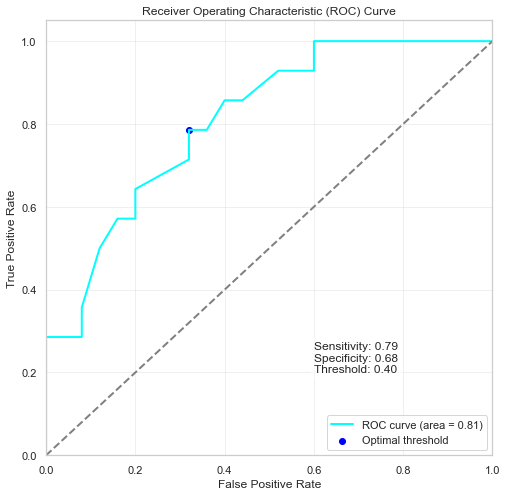

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# Cargar el archivo CSV

# Definir las características y la variable objetivo
X = df.drop(columns=['Flare'])  
y = df['Flare']

# Análisis Exploratorio de Datos 
# plt.figure(figsize=(20, 15))
# for i, col in enumerate(X.columns):
#     plt.subplot(5, 5, i+1)
#     sns.boxplot(data=X, y=col)
#     plt.title(col)
# plt.tight_layout()
# plt.show()

# Escalado robusto para reducir el impacto de los outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Crear el modelo Random Forest para Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)

# Seleccionar características con Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', perc=100, random_state=42)
boruta_selector.fit(X_scaled, y)

# Obtener las características seleccionadas y su ranking
selected_features = X.columns[boruta_selector.support_]
feature_ranking = boruta_selector.ranking_[boruta_selector.support_]

# Crear un DataFrame con las características seleccionadas y su ranking
df_selected_features = pd.DataFrame({
    'Características Seleccionadas': selected_features,
    'Ranking': feature_ranking
}).sort_values(by='Ranking').reset_index(drop=True)

# Mostrar la tabla de características seleccionadas
print(df_selected_features)

# Asegurarse de que se seleccionaron 50 características (si hay menos, ajustar el algoritmo)
if df_selected_features.shape[0] < 50:
    boruta_selector.set_params(perc=boruta_selector.perc - 10)
    boruta_selector.fit(X_scaled, y)
    selected_features = X.columns[boruta_selector.support_]
    feature_ranking = boruta_selector.ranking_[boruta_selector.support_]

    # Actualizar el DataFrame con las características seleccionadas y su ranking
    df_selected_features = pd.DataFrame({
        'Características Seleccionadas': selected_features,
        'Ranking': feature_ranking
    }).sort_values(by='Ranking').reset_index(drop=True)

    # Mostrar la tabla de características seleccionadas
    print(df_selected_features)

# Dividir los datos en entrenamiento y prueba
X_selected = X_scaled[:, boruta_selector.support_]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para determinar el umbral óptimo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Predecir las clases usando el umbral óptimo
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Calcular especificidad y sensibilidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Bootstrap para intervalo de confianza del AUC y otras métricas
n_iterations = 100
random_state = 42
np.random.seed(random_state)
aucs = []
accuracies = []
sensitivities = []
specificities = []
optimal_values = []

for _ in range(n_iterations):
    # Resamplear los datos de entrenamiento
    X_resampled, y_resampled = resample(X_train, y_train)
    
    # Ajustar el modelo con los datos resampleados
    model.fit(X_resampled, y_resampled)
    
    # Predecir probabilidades en el conjunto de prueba original
    y_pred_prob_resampled = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el umbral óptimo
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    optimal_values.append(optimal_value_resampled)
    
    # Predecir las clases usando el umbral óptimo
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    
    # Calcular AUC y otras métricas
    aucs.append(roc_auc_score(y_test, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_test, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_test, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))

# Calcular intervalos de confianza
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

# Validación cruzada para AUC
cv_auc_scores = cross_val_score(model, X_selected, y, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)

# Validación cruzada para accuracy
cv_accuracy_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

# Redondear los resultados a 3 decimales
def round_results(value):
    if isinstance(value, (float, int)):
        return round(value, 3)
    elif isinstance(value, list) or isinstance(value, np.ndarray):
        return [round(v, 3) for v in value]
    return value

results = {
    'AUC': round_results(auc),
    'AUC_CI': round_results(auc_ci),
    'Accuracy_CI': round_results(accuracy_ci),
    'Sensitivity_CI': round_results(sensitivity_ci),
    'Specificity_CI': round_results(specificity_ci),
    'Optimal_Value_CI': round_results(optimal_value_ci),
    'Mean_CV_AUC': round_results(mean_cv_auc),
    'Mean_CV_Accuracy': round_results(mean_cv_accuracy),
    'Specificity': round_results(specificity),
    'Sensitivity': round_results(sensitivity),
    'Optimal_Value': round_results(optimal_threshold)
}

df_results = pd.DataFrame([results])
output_path = 'resultados_multivariable_proteinas_random_forest_boruta.xlsx'
df_results.to_excel(output_path, index=False)

# Mostrar los resultados
print(df_results)

# Visualizar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='cyan', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='blue', label='Optimal threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Mostrar valores de sensibilidad, especificidad y valor de corte
plt.text(0.6, 0.2, f'Sensitivity: {sensitivity:.2f}\nSpecificity: {specificity:.2f}\nThreshold: {optimal_threshold:.2f}',
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12)

plt.show()


## Selección de boruta con muestras sintéticas 

   Características Seleccionadas  Ranking
0                           SOST        1
1                          GPNMB        1
2                          EPHB2        1
3                           RPS3        1
4                         MAPK12        1
5                          PA2G4        1
6                            PGD        1
7                          ROBO3        1
8                            CA3        1
9                           NCR3        1
10                          EDAR        1
11                          CD22        1
12                        SPINT2        1
13                           EDA        1
14                       SIGLEC6        1
15                          KLK7        1
16                          CD47        1
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
     AUC         AUC_CI     Accuracy_CI Sensitivi

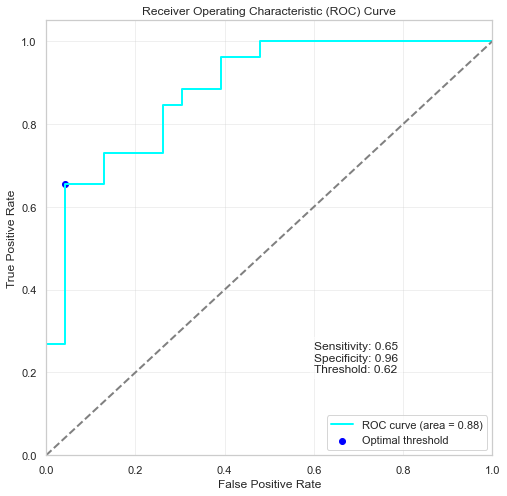

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

# Cargar el archivo CSV

# Definir las características y la variable objetivo
X = df.drop(columns=['Flare'])  
y = df['Flare']

# Escalado robusto para reducir el impacto de los outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Crear el modelo Random Forest para Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)

# Seleccionar características con Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', perc=100, random_state=42)
boruta_selector.fit(X_resampled, y_resampled)

# Obtener las características seleccionadas y su ranking
selected_features = X.columns[boruta_selector.support_]
feature_ranking = boruta_selector.ranking_[boruta_selector.support_]

# Crear un DataFrame con las características seleccionadas y su ranking
df_selected_features = pd.DataFrame({
    'Características Seleccionadas': selected_features,
    'Ranking': feature_ranking
}).sort_values(by='Ranking').reset_index(drop=True)

print(df_selected_features)

# Dividir los datos en entrenamiento y prueba con las características seleccionadas
X_selected = X_resampled[:, boruta_selector.support_]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# Optimización de hiperparámetros usando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Predecir probabilidades
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para determinar el umbral óptimo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Predecir las clases usando el umbral óptimo
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Calcular especificidad y sensibilidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Bootstrap para intervalo de confianza del AUC y otras métricas
n_iterations = 100
random_state = 42
np.random.seed(random_state)
aucs = []
accuracies = []
sensitivities = []
specificities = []
optimal_values = []

for _ in range(n_iterations):
    X_resampled_iter, y_resampled_iter = resample(X_train, y_train)
    best_model.fit(X_resampled_iter, y_resampled_iter)
    y_pred_prob_resampled = best_model.predict_proba(X_test)[:, 1]
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    optimal_values.append(optimal_value_resampled)
    
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    aucs.append(roc_auc_score(y_test, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_test, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_test, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))

# Calcular intervalos de confianza
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

# Validación cruzada para AUC
cv_auc_scores = cross_val_score(best_model, X_selected, y_resampled, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)

# Validación cruzada para accuracy
cv_accuracy_scores = cross_val_score(best_model, X_selected, y_resampled, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

# Redondear los resultados a 3 decimales
def round_results(value):
    if isinstance(value, (float, int)):
        return round(value, 3)
    elif isinstance(value, list) or isinstance(value, np.ndarray):
        return [round(v, 3) for v in value]
    return value

results = {
    'AUC': round_results(auc),
    'AUC_CI': round_results(auc_ci),
    'Accuracy_CI': round_results(accuracy_ci),
    'Sensitivity_CI': round_results(sensitivity_ci),
    'Specificity_CI': round_results(specificity_ci),
    'Optimal_Value_CI': round_results(optimal_value_ci),
    'Mean_CV_AUC': round_results(mean_cv_auc),
    'Mean_CV_Accuracy': round_results(mean_cv_accuracy),
    'Specificity': round_results(specificity),
    'Sensitivity': round_results(sensitivity),
    'Optimal_Value': round_results(optimal_threshold)
}

df_results = pd.DataFrame([results])
df_results.to_excel('resultados_ajustados.xlsx', index=False)

# Mostrar los resultados
print(df_results)

# Visualizar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='cyan', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='blue', label='Optimal threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.text(0.6, 0.2, f'Sensitivity: {sensitivity:.2f}\nSpecificity: {specificity:.2f}\nThreshold: {optimal_threshold:.2f}',
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12)

plt.show()


In [37]:
# Obtener las características seleccionadas de la base original escalada
X_full_selected = X_scaled[:, boruta_selector.support_]

# Predecir probabilidades de recaída para cada paciente
probabilidades = best_model.predict_proba(X_full_selected)[:, 1]

# Convertir a porcentaje
df['Probabilidad_Recaida_%'] = probabilidades * 100

# Guardar en un nuevo archivo
df.to_excel('pacientes_con_probabilidades.xlsx', index=False)

print(df[['Probabilidad_Recaida_%']].head())


   Probabilidad_Recaida_%
0               49.768557
1               17.583684
2               62.783019
3               87.917633
4                9.436143


In [42]:

df['Clasificacion'] = np.where(df['Probabilidad_Recaida_%'] >= 62, 
                               'Posible Recaída', 
                               'Sin Recaída')
print(df['Clasificacion'])

0          Sin Recaída
1          Sin Recaída
2      Posible Recaída
3      Posible Recaída
4          Sin Recaída
            ...       
125        Sin Recaída
126        Sin Recaída
127        Sin Recaída
128    Posible Recaída
129        Sin Recaída
Name: Clasificación, Length: 130, dtype: object


In [43]:
df=df.drop(columns=['Clasificación'])

In [45]:
# Asegúrate de que tienes Paciente_ID, Probabilidad_Recaida_% y Riesgo en tu df
# (si Paciente_ID no existe, puedes crear un índice como identificador)


# Crear columna de Riesgo por rangos
def categorizar_riesgo(prob):
    if prob < 40:
        return "Bajo"
    elif prob < 62:
        return "Moderado"
    else:
        return "Alto"

df['Riesgo'] = df['Probabilidad_Recaida_%'].apply(categorizar_riesgo)

# Eliminar la columna Clasificación si existe
if 'Clasificación' in df.columns:
    df = df.drop(columns=['Clasificación'])

# Seleccionar solo las 3 columnas finales
df_final = df[['ID', 'Probabilidad_Recaida_%', 'Riesgo']]

# Exportar a Excel
df_final.to_excel('pacientes_probabilidad_riesgo.xlsx', index=False)

print(df_final.head())


   ID  Probabilidad_Recaida_%    Riesgo
0   1               49.768557  Moderado
1   2               17.583684      Bajo
2   3               62.783019      Alto
3   4               87.917633      Alto
4   5                9.436143      Bajo




```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
```

Estas líneas importan las bibliotecas necesarias para el análisis de datos, visualización y selección de características. pandas y numpy son utilizados para la manipulación de datos, matplotlib y seaborn para la visualización, BorutaPy para la selección de características, y varios módulos de sklearn para la creación y evaluación de modelos.



```python
X = df.drop(columns=['Flare'])  
y = df['Flare']
```
Estas líneas separan el conjunto de datos en X (las características o variables independientes) y y (la variable objetivo o dependiente, en este caso, la columna 'Flare').

```python
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
```

El **RobustScaler** se utiliza para escalar las características, reduciendo el impacto de los valores atípicos. `fit_transform` ajusta el escalador y transforma los datos.

```python
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)
```
Se define un modelo de Random Forest con parámetros específicos, como `class_weight='balanced'` para manejar el desequilibrio de clases, max_depth=5 para limitar la profundidad de los árboles, y random_state=42 para reproducibilidad.

```python
boruta_selector = BorutaPy(rf, n_estimators='auto', perc=100, random_state=42)
boruta_selector.fit(X_scaled, y)

```
Se crea un objeto BorutaPy que utiliza el modelo de Random Forest para seleccionar características relevantes. fit ajusta el selector a los datos.
```python
X_selected = X_scaled[:, boruta_selector.support_]

```
Se extraen las características seleccionadas por Boruta.
```python
if X_selected.shape[1] < 50:
    boruta_selector.set_params(perc=boruta_selector.perc - 10)
    boruta_selector.fit(X_scaled, y)
    X_selected = X_scaled[:, boruta_selector.support_]

```
Si se seleccionan menos de 50 características, se ajusta el parámetro perc y se vuelve a ejecutar el ajuste.
```python
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

```
Se dividen los datos en conjuntos de entrenamiento y prueba en una proporción 70-30.

```python
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

```
Se define y ajusta un modelo de Random Forest con los datos de entrenamiento, después se predicen las probabilidades de la clase positiva para los datos de prueba y see calcula la curva ROC, determinando el umbral óptimo para la predicción.
```python
y_pred = (y_pred_prob >= optimal_threshold).astype(int)
auc = roc_auc_score(y_test, y_pred_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

```
Se predicen las clases usando el umbral óptimo. Calculamos el AUC, la especificidad y la sensibilidad usando las predicciones y las etiquetas reales.
```python
n_iterations = 100
random_state = 42
np.random.seed(random_state)
aucs, accuracies, sensitivities, specificities, optimal_values = [], [], [], [], []

for _ in range(n_iterations):
    # Resamplear los datos de entrenamiento
    X_resampled, y_resampled = resample(X_train, y_train)
    
    # Ajustar el modelo con los datos resampleados
    model.fit(X_resampled, y_resampled)
    
    # Predecir probabilidades en el conjunto de prueba original
    y_pred_prob_resampled = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el umbral óptimo
    fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, y_pred_prob_resampled)
    optimal_idx_resampled = np.argmax(tpr_resampled - fpr_resampled)
    optimal_value_resampled = thresholds_resampled[optimal_idx_resampled]
    optimal_values.append(optimal_value_resampled)
    
    # Predecir las clases usando el umbral óptimo
    y_pred_resampled = (y_pred_prob_resampled >= optimal_value_resampled).astype(int)
    
    # Calcular AUC y otras métricas
    aucs.append(roc_auc_score(y_test, y_pred_prob_resampled))
    accuracies.append(accuracy_score(y_test, y_pred_resampled))
    
    tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_test, y_pred_resampled).ravel()
    sensitivities.append(tp_resampled / (tp_resampled + fn_resampled))
    specificities.append(tn_resampled / (tn_resampled + fp_resampled))

```
Se realiza un bootstrap para calcular los intervalos de confianza del AUC y otras métricas. Se resamplean los datos, se ajusta el modelo y se calculan las métricas para cada iteración.
```python
auc_ci = np.percentile(aucs, [2.5, 97.5])
accuracy_ci = np.percentile(accuracies, [2.5, 97.5])
sensitivity_ci = np.percentile(sensitivities, [2.5, 97.5])
specificity_ci = np.percentile(specificities, [2.5, 97.5])
optimal_value_ci = np.percentile(optimal_values, [2.5, 97.5])

```
Se calculan los intervalos de confianza para AUC, exactitud, sensibilidad, especificidad y el valor óptimo del umbral.

```python
cv_auc_scores = cross_val_score(model, X_selected, y, cv=5, scoring='roc_auc')
mean_cv_auc = np.mean(cv_auc_scores)
cv_accuracy_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_accuracy_scores)

```
Por último, Se realiza una validación cruzada de 5 pliegues para calcular el AUC y la exactitud promedio del modelo.

```python

```